# Machine Learning Fundamentals: Core Concepts Through Decision Trees

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/roy-cruz/CROEM-ML2025/blob/master/croem-ml2025/content/01_Basics-DecisionTrees.ipynb)

## Concept

In this first lesson, you will be jumping right into working with your own ML model in order to get an intuitive sense of fundamental concepts that are crucial for most applications of ML. Note that we will be focusing mostly on classification problems, as they are the easiest to understand when you are first learning about ML. However, ML can be used to solve other types of problems such as anomaly detection and data generation. 

The first model we'll look at are decision trees. Decision trees are a tree-like graph where each node represents a question about one of the attributes of the data. This might sound complicated, but you use a similar knowledge all the time to make decisions! For instance, if you're sorting books, and you want to categorize them by whether they're fiction or non-fiction, you might first ask "Is this book fiction?" If yes, you put it in the fiction pile; if no, it goes in the non-fiction pile. You can keep asking questions like "Is it a mystery novel?" or "Is it a biography?" until every book is sorted. Decision trees work in a similar way, asking a series of questions about the features of your data to classify or predict outcomes.

```{mermaid}
graph TD
    B{"Is it fiction?<div>(100 books)"}
    B -- Yes --> C{"Is it a mystery novel?<div>(28 books)"}
    C -- Yes --> D["Mystery Fiction<div>(12 books)"]
    C -- No --> E["Other Fiction<div>(16 books)"]
    B -- No --> F{"Is it a biography?<div>(72 books)"}
    F -- Yes --> G["Biography Non-Fiction<div>(50 books)"]
    F -- No --> H["Other Non-Fiction<div>(22 books)"]
```

We see multiple parts in the tree shown above. Here are its main components:

- Root node or root: The very top node in the tree
- Internal or decision nodes: They have arrows pointing to them and away from them.
- Leaf nodes or leaves: They only have arrows pointing to them and represent the final classification.

Note that an arrow to the left typically represents `True`, while an arrow to the right represents `False`. 

You can see that classification trees are conceptually simple models. This means that they are highly **interpretable**, something that can be very desireable for a model as it allows us to peer into the inner workings of how the model works instead of having to treat the model as a **black box**.

## Wisconsin breast cancer dataset
### Characterization
Now that we know the basics of trees, lets load some data and build our own tree! The data we will use here consists of physical measurements of breast tumors. The goal is to classify a tumor by whether or not its malignant (0) or benign (1).

```{figure} images/cancer.png
---
height: 250px
name:   cancer
align:  center
---
Artist rendition of bening and malignant tumors (https://doi.org/10.1038/s41598-024-57740-5)
```

The datasets can be loaded through `sklearn`, which is an ML library in Python which offers tools for data analysis, modeling, simple models and even sample datasets.

In [36]:
# Importing the iris dataset
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(
    as_frame=True
)
data_df = data["frame"]
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [37]:
print(data_df.keys())

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


There are a lot of features! For now, lets focus on just a couple of features in this dataset, though you can add or remove more later on.

In [38]:
main_ftrs = [
    "mean radius",
    "mean texture",
    "mean smoothness",
    "mean symmetry",
]

data_df = data_df[main_ftrs + ["target"]]
data_df.head()

,mean radius,mean texture,mean smoothness,mean symmetry,target
0,17.99,10.38,0.11840,0.2419,0
1,20.57,17.77,0.08474,0.1812,0
2,19.69,21.25,0.10960,0.2069,0
3,11.42,20.38,0.14250,0.2597,0
4,20.29,14.34,0.10030,0.1809,0


An important thing to always do when working in ML is to understand the data you're working with, and understanding if it is skewed or there are any classifications (i.e. benign vs malignant) that are over-represented in your dataset, as this can introduce some issues later on. We can make a bar plot showing the frequency of each classification in order to see how each one is represented in the data.

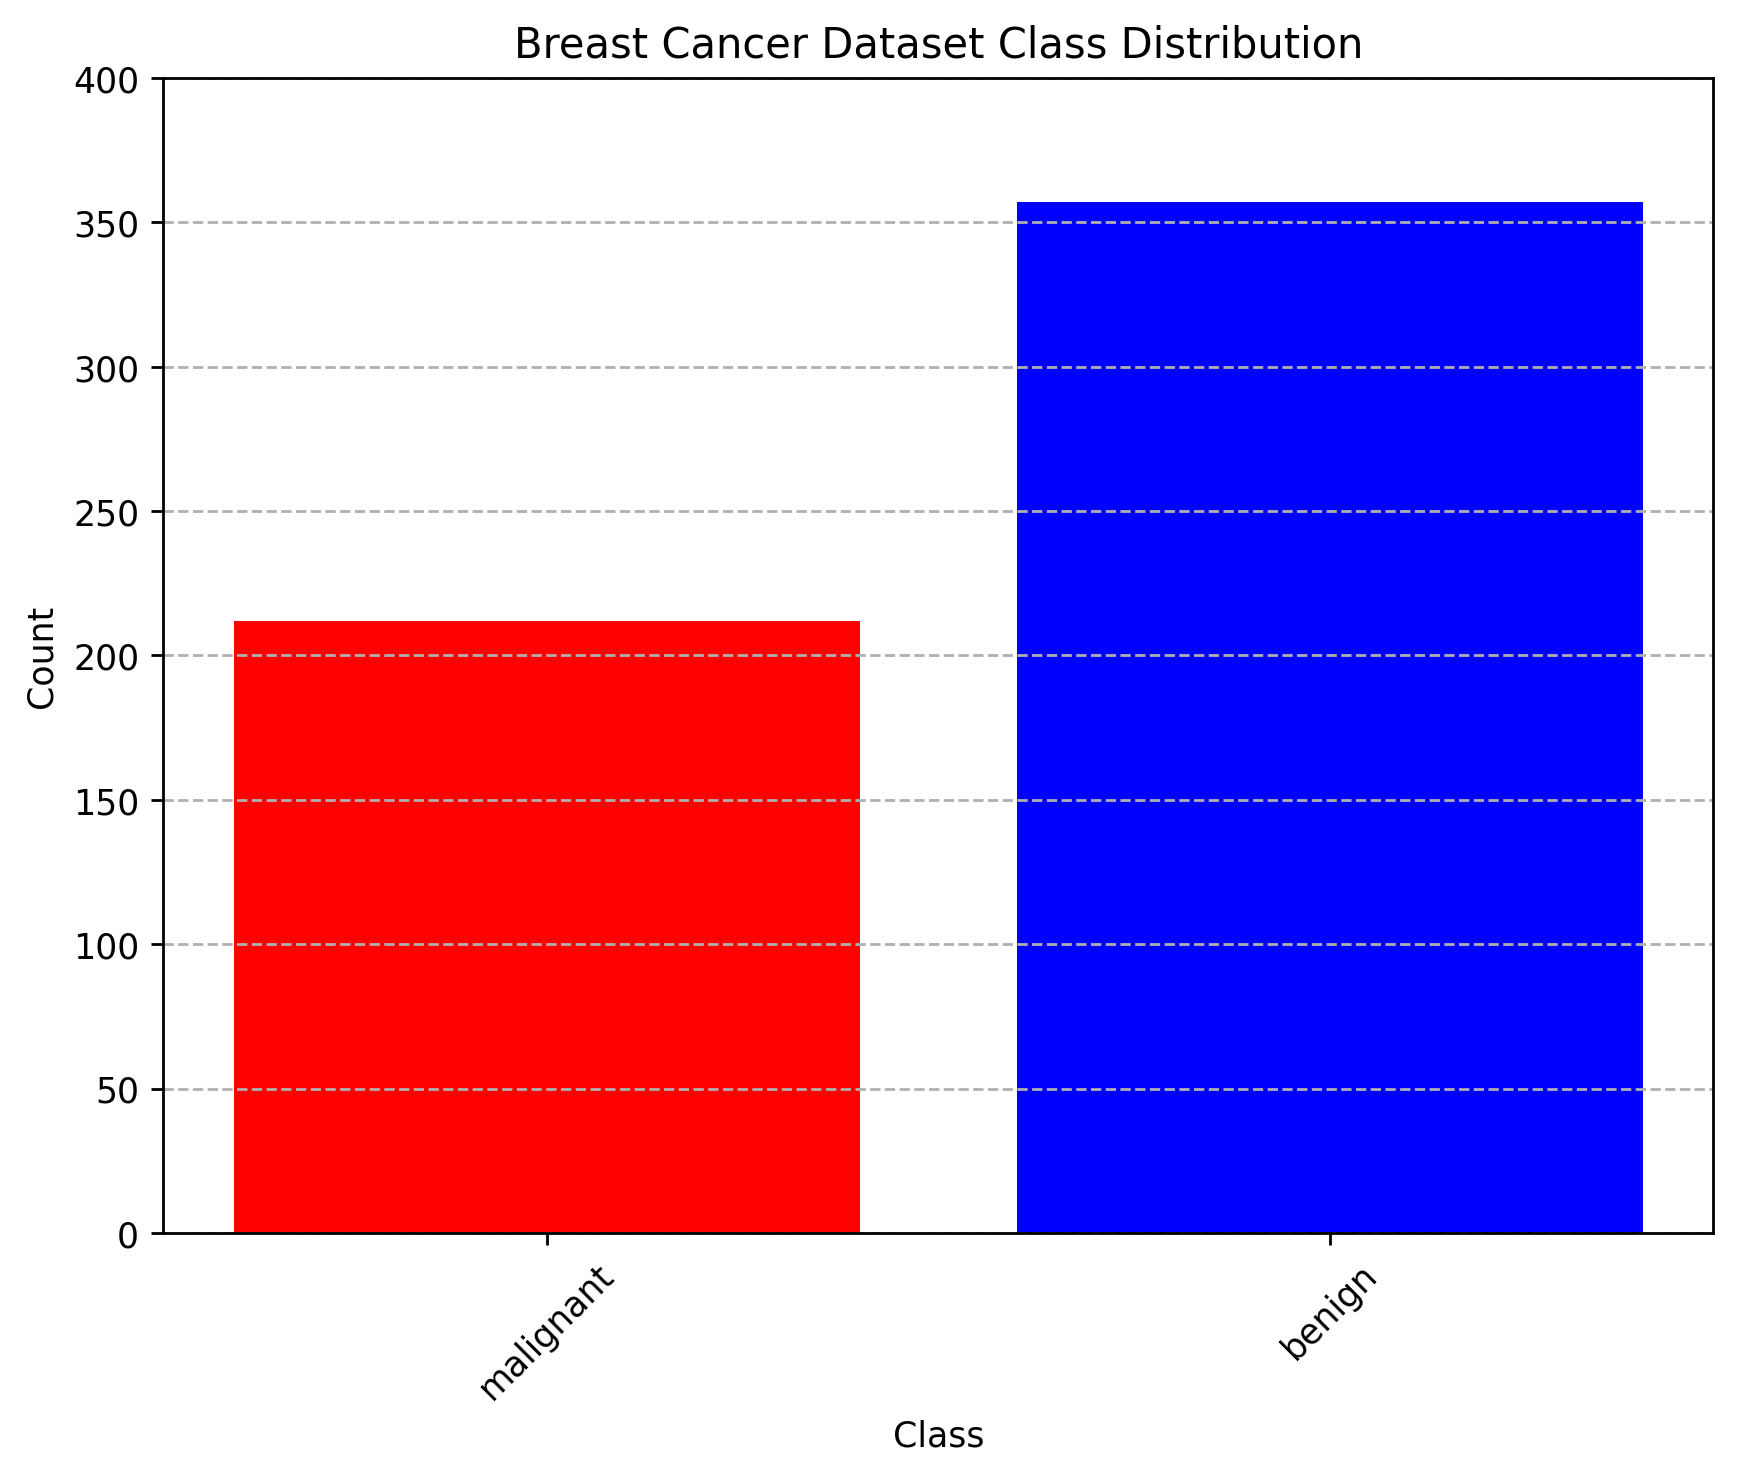

In [39]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6), dpi=250)

bar_positions = [0, 0.5]
bar_values = [
    np.sum(data["target"] == 0),
    np.sum(data["target"] == 1),
]

plt.bar(
    bar_positions,
    bar_values,
    width=0.4,
    color=["red", "blue"]
)

plt.title("Breast Cancer Dataset Class Distribution")
plt.grid(axis="y", linestyle="--")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(bar_positions, data["target_names"], rotation=45)
plt.yticks(np.arange(0, max(bar_values) + 50, 50))
plt.show()


We can see that each class is not equally represented. When we encounter such situations, it is important to address this imbalance. This can involve techniques such as resampling the dataset (either by oversampling the minority class or undersampling the majority class), generating synthetic samples, or using algorithms that are robust to class imbalance. Ignoring class imbalance can lead to biased models that perform poorly on underrepresented classes. For now, lets leave the data as it is, as the imbalance is not too high for our purposes.

Another thing that is also important is to understand how your data actually looks like. This can be crucial in clasification problems, as it might give you insight into what features in your data might serve as better discriminators for each class, and what features of the data are not so useful. In order to see our data, we can make scatter plots between all of the features. We will be doing this with a very handy library called `seaborn` which uses `matplotlib` to give us an assortment of graphical tools that are very useful in data analysis. The particular tool we use here is `sns.pairplot`. You can find the documentation here: [link](https://seaborn.pydata.org/generated/seaborn.pairplot.html).

<Figure size 2000x2000 with 0 Axes>

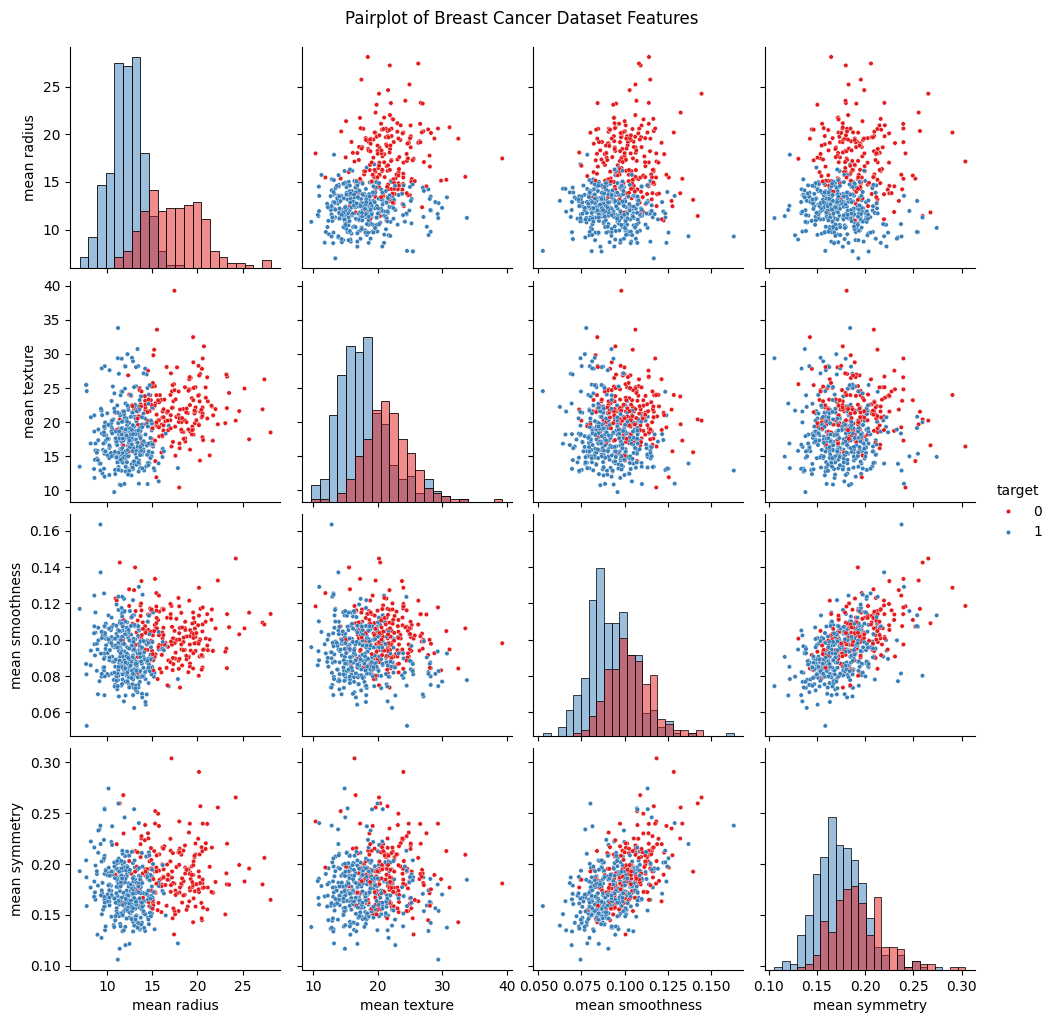

In [40]:
import seaborn as sns

plt.figure(figsize=(8, 8), dpi=250)
sns.pairplot(
    data_df, 
    hue="target", 
    palette="Set1",
    diag_kind="hist",
    # Make dots smaller
    plot_kws={"s": 10},
)
plt.suptitle("Pairplot of Breast Cancer Dataset Features", y=1.02)
plt.show()

If we pay close attention to the scatter plots, we can see that for some features, there is a noticeable separation between each class. Features with this property are valuable because they serve as discriminating variables, allowing us to more accurately classify tumors. Evaluating feature usefulness is important because adding features with little or no predictive power can actually worsen model performance. For learning purposes and to make visualizations later on easier to handle, we will only move forward with just two features from the dataset. However, we encourage you to experiment and add more features later on!

In [41]:
# Choosing only two features for simplicity
# 0 = mean radius
# 1 = mean texture
# 2 = mean smoothness
# 3 = mean symmetry

feature_indices = [1, 3] # Change indices here!

feature_names = data["feature_names"][feature_indices]

X = data_df.iloc[:, feature_indices].values
y = data_df["target"].values

### Building datasets

We will be splitting the data into three sub-datasets which will help us train the model later on:

- Training set: Used to train the model and have it learn how to classify the data.
- Validation set: Used to tune model parameters and evaluate how well the model generalizes to data it hasn't been trained on during development.
- Test set: Used only at the end to assess the final performance of the model on completely new data.

By using separate datasets for training, validation, and testing, we make sure that the model is not just memorizing the training data, but is actually learning patterns that help it perform well on new, unseen data. This helps us get a more accurate idea of how the model will work in real-world situations.

(341, 2) (114, 2) (114, 2)


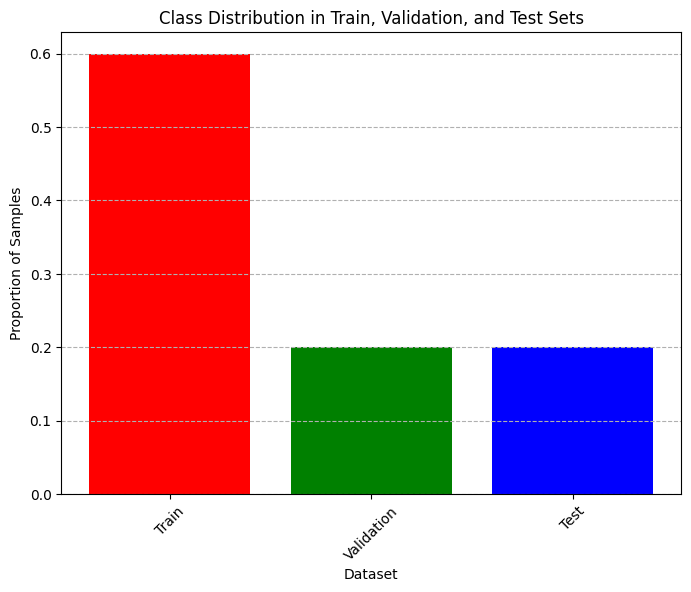

In [42]:
from sklearn.model_selection import train_test_split # Importing the train_test_split function
train_size = 0.6 # 60% of the data will be used for training
test_size = 0.2 # 20% of the data will be used for testing
val_size = 0.2 # 20% of the training data will be used for validation

assert train_size + test_size + val_size == 1, "Train, test, and validation sizes must sum to 1"

# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=test_size,
    random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, 
    y_train, 
    test_size=val_size/(train_size + val_size),
    random_state=42
)

print(X_train.shape, X_val.shape, X_test.shape)

# Plot bar chart of class distribution in training, validation, and test sets (normalized)
plt.figure(figsize=(8, 6), dpi=100)
plt.title("Class Distribution in Train, Validation, and Test Sets")
plt.ylabel("Proportion of Samples")
plt.xlabel("Dataset")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--")
plt.bar(
    x=["Train", "Validation", "Test"], 
    height = np.array([len(y_train), len(y_val), len(y_test)])/len(data_df), 
    color=["red", "green", "blue"]
)
plt.show()

## Building a classification tree

In order to build a decision tree model, we will be using `sklearn` again, which includes pre-defined tools to build such a model.

In [43]:
from sklearn import tree # Importing tree which contains the DecisionTreeClassifier

We now create the model and train it by providing it with the training dataset we just created. Note that when we create the classifier, we can adjust how it works by passing arguments to it. We will discuss more about these arguments later, but you can read a bit about them [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [44]:
clf = tree.DecisionTreeClassifier(
    max_depth=3,
    criterion="gini",
    random_state=42,
)

Here, we use two very important arguments: `max_depth` and `criterion`.
- `max_depth`: The maximum amount of "layers" the tree can have. Deeper trees tend to be better at classification, but that comes with its own drawbacks as we will see later on.
- `criterion`: Dictates the function used to measure the quality or purity of a split during the training process. The available functions are `gini`, `entropy` and `log_loss`. We will only be using `gini` here. More on this metric later.

Now that the tree has been created, we can go ahead and train it with the data we separated specifically for this purpose. Note that we will be discussing some of the details of what this "training" consists of later. For now, just take it as the model "learning" how to separate the data into the different classes from the examples you are providing it in the training dataset.

In [45]:
clf = clf.fit(
    X_train, 
    y_train,
)

Now that the model is trained, we can use the method `tree.plot_tree` in order to see the tree itself.

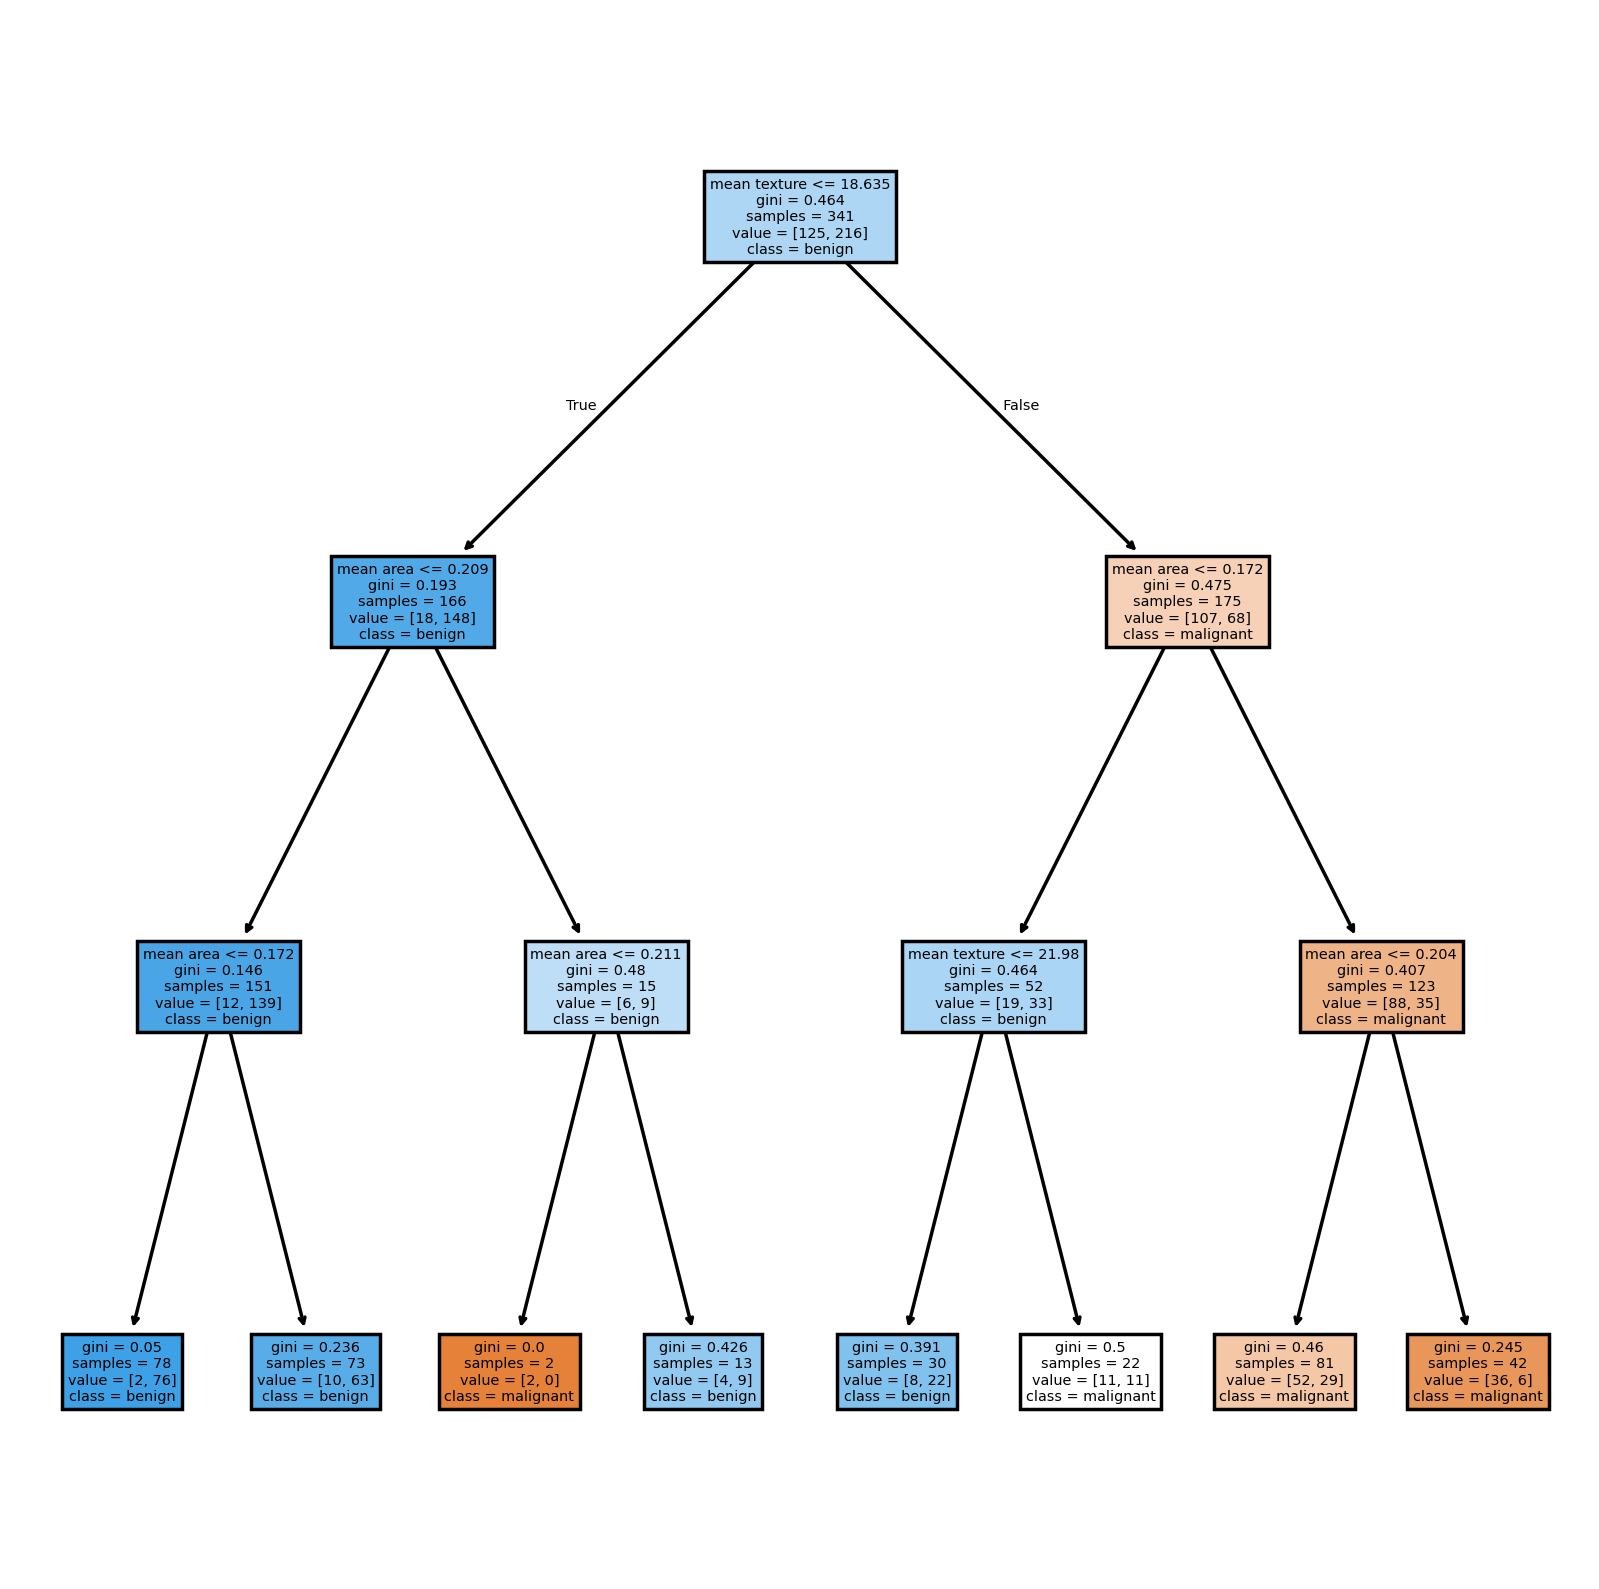

In [46]:
plt.figure(figsize=(8, 8), dpi=250)
tree.plot_tree(
    clf, 
    filled=True,
    feature_names=feature_names,
    class_names=data["target_names"],
)
plt.show()

Now we want to see how our model performs. To do this, we can use several common metrics for quantifying the performance of classification models. These metrics help us understand how well our model is making predictions, and each one gives us a different perspective on its strengths and weaknesses.

- Accuracy: Measures the proportion of correct predictions out of all predictions made.
    ```{math}
    \text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}
    ```
  - Good for: Balanced datasets where all classes are equally important.  
  - Limitations: Can be misleading if the dataset is imbalanced (i.e., some classes are much more frequent than others).

- Precision: Measures the ratio of correctly predicted positive observations to the total predicted positives.
    ```{math}
    \text{Precision} = \frac{\text{TP}}{\text{TP}+\text{FP}}
    ```
    where TP = True Positives, FP = False Positives.  
  - Good for: Situations where the cost of a false positive is high (e.g., spam detection, where marking a real email as spam is bad).

- Recall (Sensitivity or True Positive Rate): Measures the ratio of correctly predicted positive observations to all actual positives.
    ```{math}
    \text{Recall} = \frac{\text{TP}}{\text{TP}+\text{FN}}
    ```
    where FN = False Negatives.  
  - Good for: Situations where missing a positive case is costly (e.g., disease screening, where missing a sick patient is worse than a false alarm).

- F1 Score: It is the harmonic mean of precision and recall. It balances the two metrics and is useful when you need a single score that accounts for both false positives and false negatives.
    ```{math}
    \text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
    ```
  - Good for: Datasets with class imbalance, or when you want to balance precision and recall.

Thankfully, `scikit-learn` offers functions that compute all of these metrics for us, so we don't have to do much work to compute these.

In [47]:
# Function for computing accuracy, precision, recall, and F1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def compute_metrics(y_true, y_pred):
    """Helper function to compute accuracy, precision, recall, and F1 score at once."""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Pretty print the metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

In [48]:
# Testing model on training and validation sets
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)

# Compute metrics for training and validation sets
print("Training Set Metrics:")
compute_metrics(y_train, y_train_pred)

print("\nValidation Set Metrics:")
compute_metrics(y_val, y_val_pred)

Training Set Metrics:
Accuracy: 0.7947
Precision: 0.8763
Recall: 0.7870
F1 Score: 0.8293

Validation Set Metrics:
Accuracy: 0.6930
Precision: 0.7397
Recall: 0.7714
F1 Score: 0.7552


The model has never "seen" the validation data. Thus, it is expected that its performance on the data it is trained on will be better than on the validation set. However, the validation set allows us to quickly confirm that the model will work even on new data. This is important because model with perfect performance on its training set might seem great, but if it fails at classifying any new data, its not very useful! 

Lets now visualize how the model makes the decision its making. 

(Unless you're curious, don't worry too much about how the following snippet of code plots the data for now.)

In [49]:
def plot_decision_boundaries(X, y, X_train, classifier, feature_names, class_names):
    """Helper function to plot decision boundaries of a classifier."""
    from sklearn.inspection import DecisionBoundaryDisplay
    fig, ax = plt.subplots(figsize=(8, 6), dpi=250)

    for i, label in enumerate(class_names):
        ax.scatter(
            X[y == i, 0], X[y == i, 1],
            label=label,
            edgecolor="black",
            color=plt.cm.RdBu(i / len(class_names)),
            s=20,
        )

    DecisionBoundaryDisplay.from_estimator(
        classifier, X_train,
        response_method="predict",
        xlabel=feature_names[0],
        ylabel=feature_names[1],
        cmap=plt.cm.RdBu,
        alpha=0.2,
        grid_resolution=300,
        ax=ax,
    )

    plt.ylim(min(X[:,1])-0.1, max(X[:,1])+0.1)
    plt.xlim(min(X[:,0]-0.1), max(X[:,0])+0.1)
    plt.legend(fontsize=12, title="Classes", title_fontsize=14)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title("Decision boundaries and data")
    plt.show()

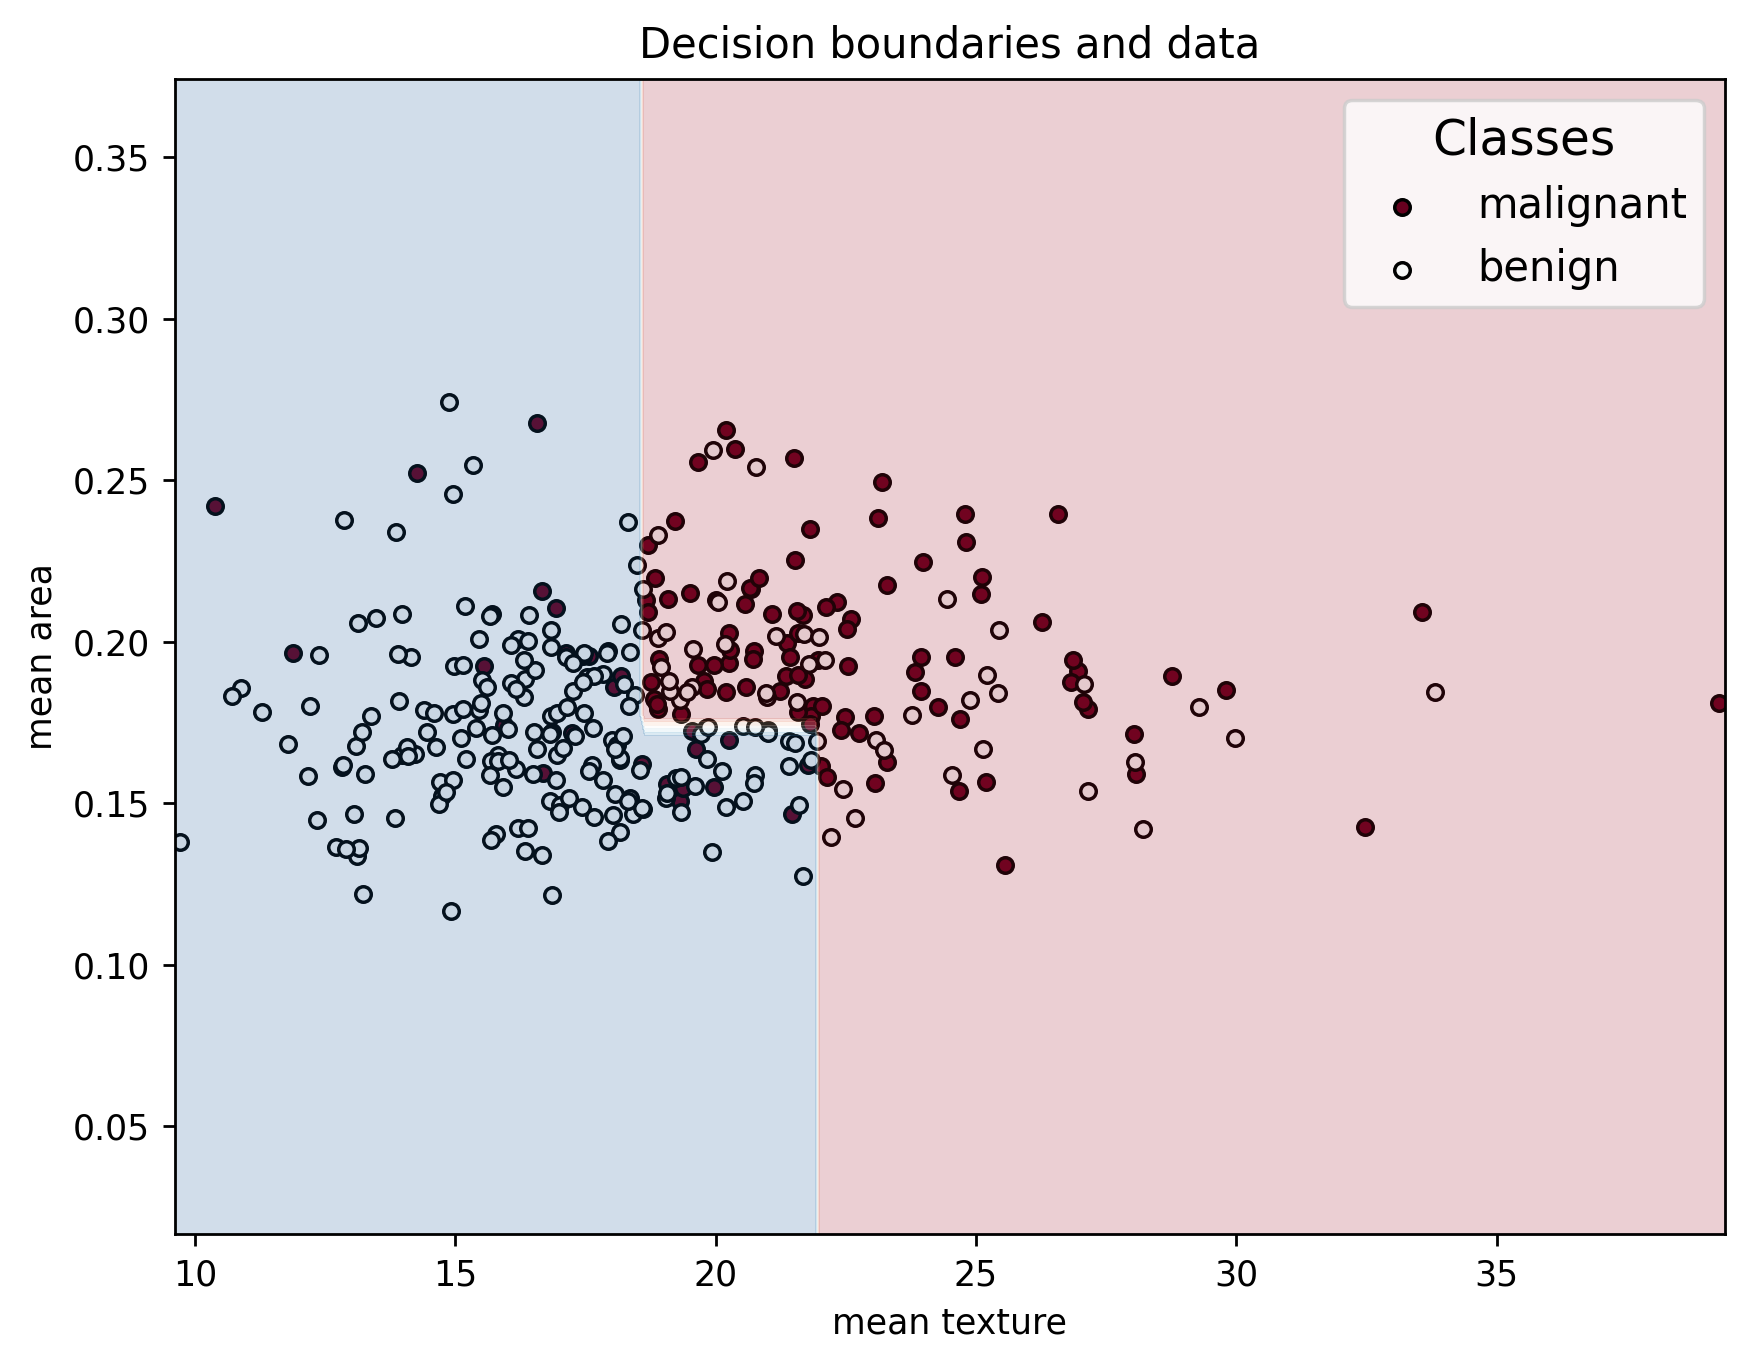

In [50]:
plot_decision_boundaries(X_train, y_train, X_train, clf, feature_names, data["target_names"])

We can see that the series of splits in the decision tree create an interesting decision boundary made up of straight segments. This plot highlights the importance of selecting features that clearly separate the classes: the greater the separation between samples of different classes, the more accurately the model can classify them. Well-chosen features lead to simpler, more effective decision boundaries and better model performance!

### Testing our tree

Now that we have a reasonably performing model, lets do a final test on the testing data that was left untouched so far so as to not bias ourselves.

Testing Set Metrics:
Accuracy: 0.7018
Precision: 0.8364
Recall: 0.6479
F1 Score: 0.7302


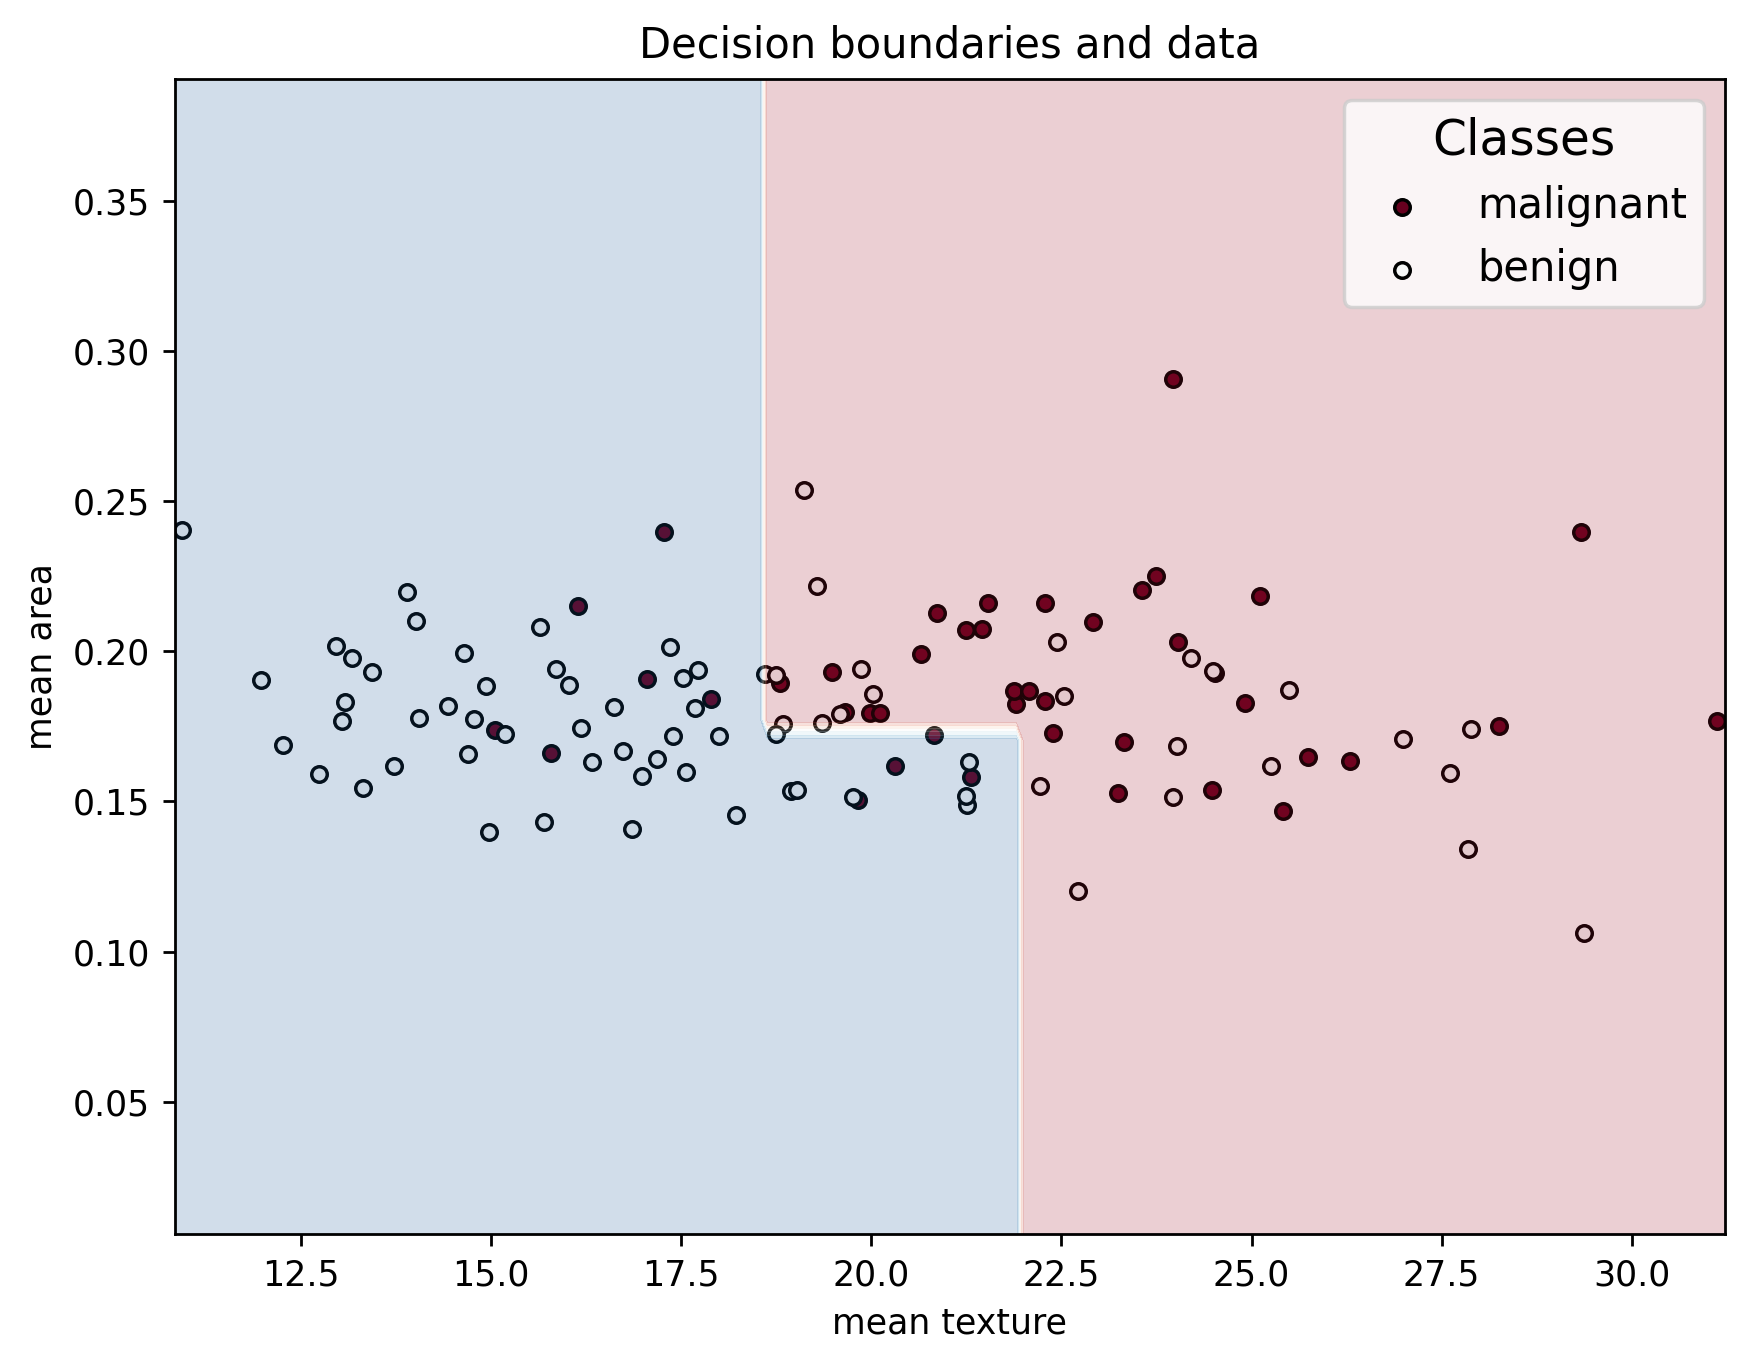

In [51]:
# Run model on test set
y_test_pred = clf.predict(X_test)

# Compute metrics for training and validation sets
print("Testing Set Metrics:")
compute_metrics(y_test, y_test_pred)
plot_decision_boundaries(X_test, y_test, X_train, clf, feature_names, data["target_names"])

If the model we made is made is any good, it should be able to achieve similar performace in the testing dataset as the one we observed in the validation dataset, which just means that it generalizes well. But what if the model doesn't generalize well at all? How would that look like?

## How does a tree "learn"?

Ask yourself this: when we were training the tree, how did it know what cut to make to which feature in each decision node in order to get the best results? While at first it might seem somewhat mysterious when you think about it, how the model actually trains is relatively straight forward, and it comes down to a common theme in ML: the minimization/maximization of some metric guiding an iterative training process. Let's see how a tree is trained to get a understanding.

Suppose you are training on just these 4 data points.

| Index | mean radius | mean smoothness | target    |
|-------|-------------|-----------------|-----------|
| 204   | 11.54       | 0.0996          | 1 (benign)|
| 70    | 12.47       | 0.1092          | 0 (malignant)|
| 540   | 13.50       | 0.0950          | 1 (benign)|
| 131   | 14.20       | 0.1200          | 0 (malignant)|

You start with the root node, in which all of your data will fall since no split has been made.

```{mermaid}
---
align:  center
---
flowchart TD
    A{"Root Node<br>[2 malignant, 2 benign]<br>GINI = 0.5"}
```

In order to determine a split, the training algorithm creates all possible splits using all features and all values of those features as thresholds. For instance, it would create the following candidate split as one case in the the set of all possible splits:

```{mermaid}
---
align:  center
---
flowchart TD
    S{"Root Node<br>mean radius <= 13.50<br>[2 malignant, 2 benign]<br>GINI = 0.5"} 
    S --> |True| A{"Node A<br>[1 malignant, 2 benign]<br>GINI = 0.44"}
    S --> |False| B{"Node B<br>[1 malignant, 0 benign]<br>GINI = 0"}
```

This process is repeated for all possible splits, and then the "best" split is chosen by choosing the one has the lowest total Gini impurity. The Gini impurity of a leaf is metric is defined as
```{math}
\text{GINI} = \sum_{i=1}^n p(i) \times (1-p(i))
```
and is a meaure of how pure the node for the classes. For example, in the above candidate tree split, the left-most leaf has Gini impurity
```{math}
\text{GINI} = \frac13 (1-\frac13) + \frac23 (1-\frac23) = 0.44
```
while the Gini impurity of the right-most leaf is
```{math}
\text{GINI} = \frac11(1-\frac11)+\frac01(1-\frac01) = 0
```
The total Gini inpurity of this candidate split is the average of the individual impurities, weighted by the amount of samples that fell into each leaf. Thus, in this case it would be:
```{math}
\text{GINI}_\text{Total} = \frac{3 \text{ samples in this node}}{2 \text{ benign in previous node} + 2 \text{ malignant in previous node}} \times 0.44 + \frac{1 \text{ sample in this node}}{2 \text{ benign in previous node} + 2 \text{ malignant in previous node}} \times 0 = 0.33
```

The total Gini impurity is computed for all candidate splits, and the candidate split with the lowest impurity is selected. This whole process is summarized in the flow chart bellow for this example.


```{mermaid}
---
align:  center
---

flowchart TD
    A[All data at node] -->|Candidate split on mean radius| B1[mean radius <= 11.54]
    A -->|Candidate split on mean radius| B2[mean radius <= 12.47]
    A -->|Candidate split on mean radius| B3[mean radius <= 13.50]
    A -->|Candidate split on mean radius| B4[mean radius <= 14.20]
    A -->|Candidate split on mean smoothness| B5[mean smoothness <= 0.0950]
    A -->|Candidate split on mean smoothness| B6[mean smoothness <= 0.0996]
    A -->|Candidate split on mean smoothness| B7[mean smoothness <= 0.1092]
    A -->|Candidate split on mean smoothness| B8[mean smoothness <= 0.1200]

    B1 --> C1[Compute total impurity of split]
    B2 --> C2[Compute total impurity of split]
    B3 --> C3[Compute total impurity of split]
    B4 --> C4[Compute total impurity of split]
    B5 --> C5[Compute total impurity of split]
    B6 --> C6[Compute total impurity of split]
    B7 --> C7[Compute total impurity of split]
    B8 --> C8[Compute total impurity of split]

    C1 --> D[Choose split with the lowest total impurity]
    C2 --> D
    C3 --> D
    C4 --> D
    C5 --> D
    C6 --> D
    C7 --> D
    C8 --> D
```

For each new subsequent node, this is repeated until the node is pure, containing only samples of a single class, or until the maximum number of specified layers is reached. 

## Overfitting and underfitting

You might ask yourself: "If we have can change the maximum amount of layers in a decision tree, why not just put the maximum? Then we can get maximum performance!" While this line of though may seem intuitive at first, going along with it can introduce a new problem: overfitting. Overfitting occurs when a model learns the training data too well, including its noise and outliers, resulting in poor generalization to new, unseen data. This happens when we give the model too many degrees of freedom, which allows it to learn the noise and variation in the data, instead of just capturing the general trends.

```{figure} images/overfitting.png
---
height: 250px
name:   overfitting
align:  center
---
Examples of under-fitting and over-fitting.
```

To illustrate this with our data, let's make another tree, but this time let's increase `max_depth`.

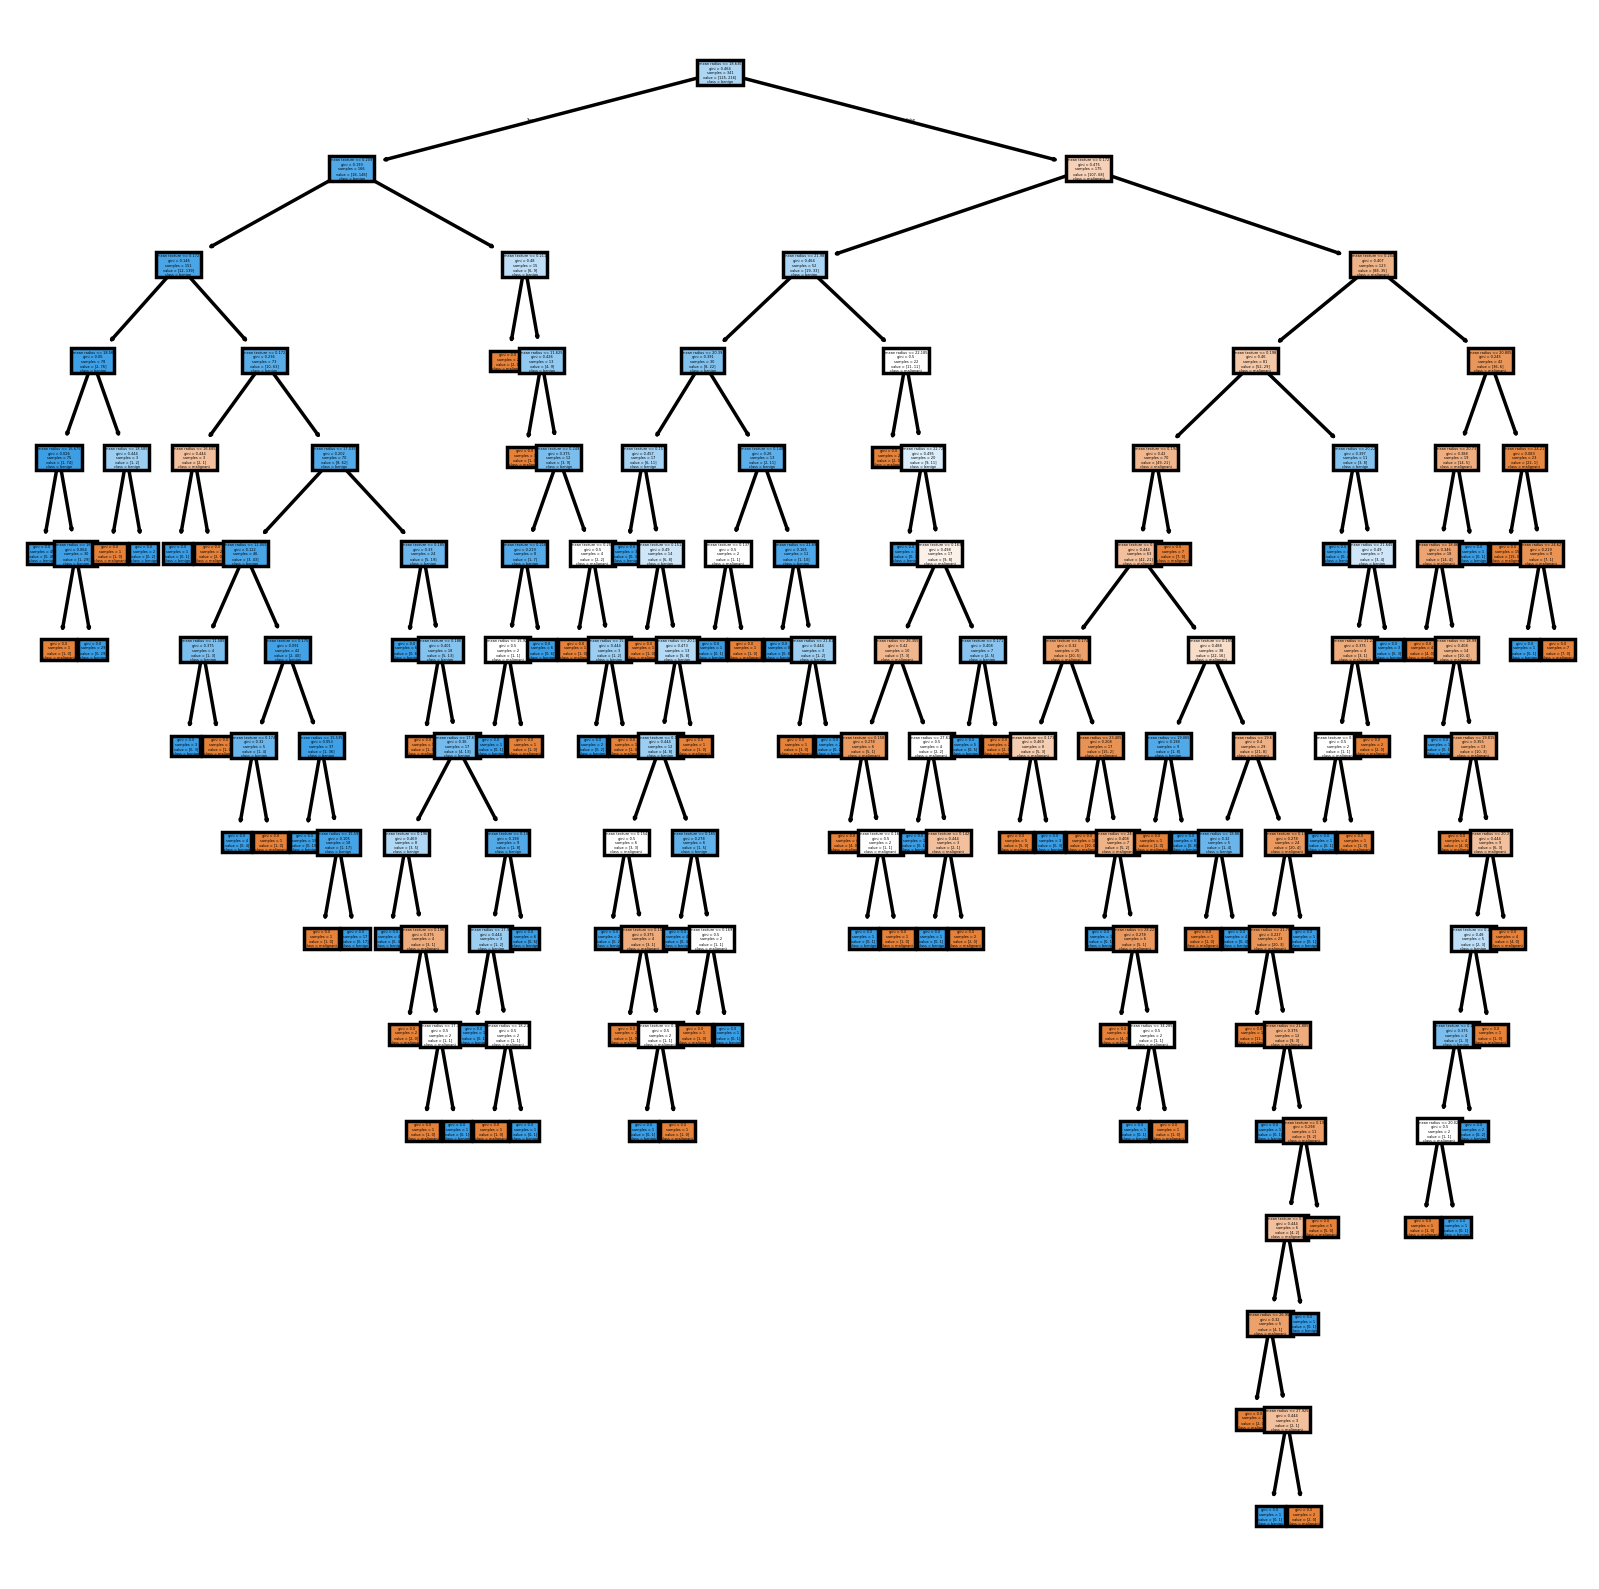

In [52]:
clf_overfit = tree.DecisionTreeClassifier(
    max_depth=40,
    criterion="gini",
    random_state=42,
)

clf_overfit = clf_overfit.fit(
    X_train, 
    y_train,
)

plt.figure(figsize=(8, 8), dpi=250)
tree.plot_tree(
    clf_overfit, 
    filled=True,
    feature_names=data["feature_names"],
    class_names=data["target_names"],
)
plt.show()

That's a very complicated tree! This, however, does not translate to better generalizability.

In [53]:
# Testing model on training and validation sets
y_train_pred = clf_overfit.predict(X_train)
y_val_pred = clf_overfit.predict(X_val)

# Compute metrics for training and validation sets
print("Training Set Metrics:")
compute_metrics(y_train, y_train_pred)
print("\nValidation Set Metrics:")
compute_metrics(y_val, y_val_pred)

Training Set Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Validation Set Metrics:
Accuracy: 0.6404
Precision: 0.6883
Recall: 0.7571
F1 Score: 0.7211


In addition, when looking at the decision boundaries, we can see that it has a very weird shape. This is because, instead of only capturing the general behavior of the data, it captures noise and statistical variability in it instead.

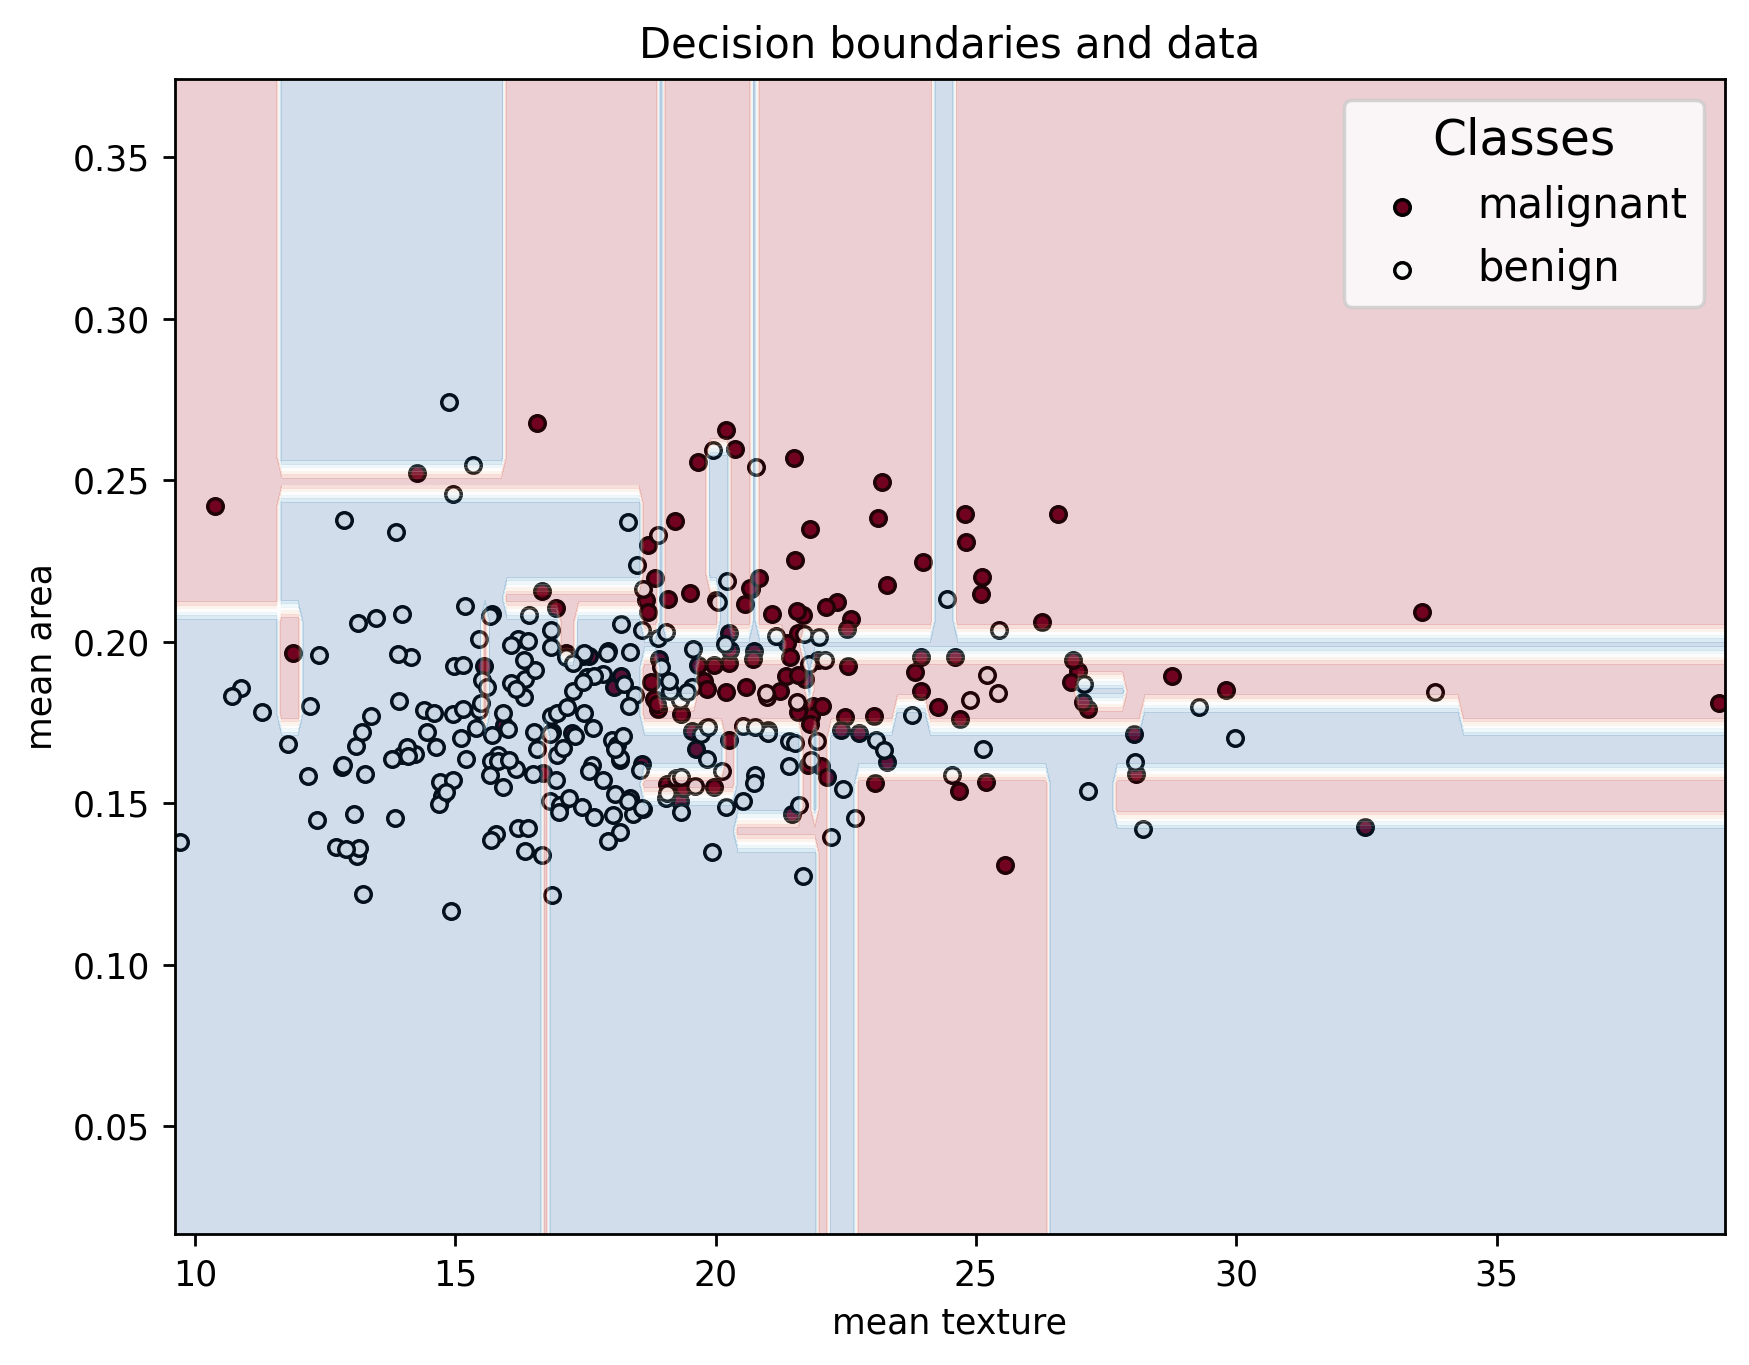

In [54]:
plot_decision_boundaries(X_train, y_train, X_train, clf_overfit, feature_names, data["target_names"])

What about if we only allowing very few layers? In this case, we may end up with a model that is underfitted. In general, this happens when we give the model too few degrees of freedom that it can use to try to capture the general trend of the data. For such a case, we could have something like the following.

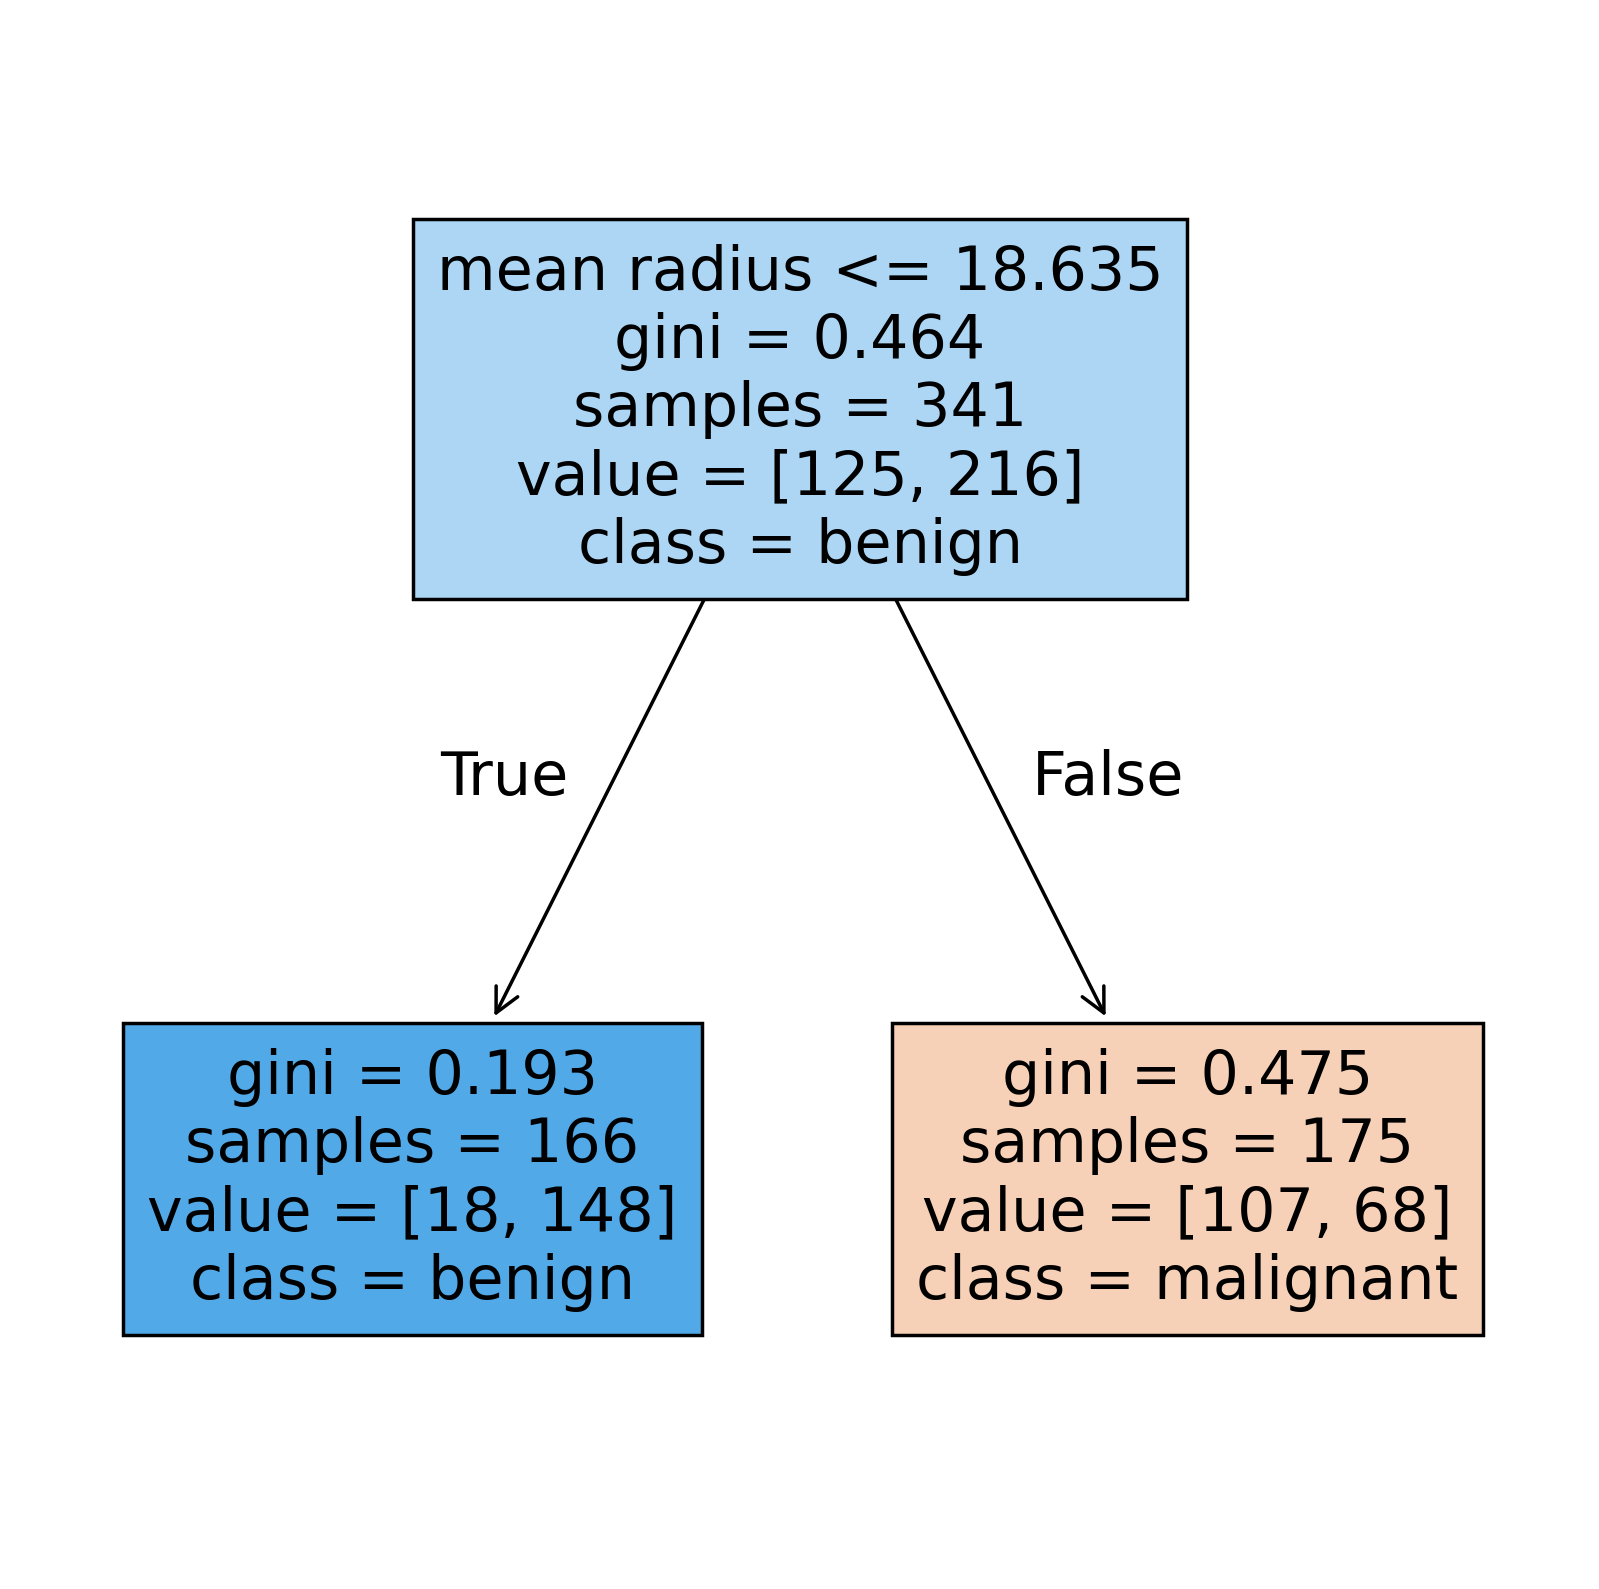

In [55]:
clf_underfit = tree.DecisionTreeClassifier(
    max_depth=1,
    criterion="gini",
    random_state=42,
)

clf_underfit = clf_underfit.fit(
    X_train, 
    y_train,
)

plt.figure(figsize=(8, 8), dpi=250)
tree.plot_tree(
    clf_underfit, 
    filled=True,
    feature_names=data["feature_names"],
    class_names=data["target_names"],
)
plt.show()

This is now a very simple tree made up a of single split! Looking at the performance metrics, we can see a significant drop.

In [56]:
# Testing model on training and validation sets
y_train_pred = clf_underfit.predict(X_train)
y_val_pred = clf_underfit.predict(X_val)

# Compute metrics for training and validation sets
print("Training Set Metrics:")
compute_metrics(y_train, y_train_pred)
print("\nValidation Set Metrics:")
compute_metrics(y_val, y_val_pred)

Training Set Metrics:
Accuracy: 0.7478
Precision: 0.8916
Recall: 0.6852
F1 Score: 0.7749

Validation Set Metrics:
Accuracy: 0.6491
Precision: 0.7500
Recall: 0.6429
F1 Score: 0.6923


And, if we look at the decision boundary, we realize that its just a line.

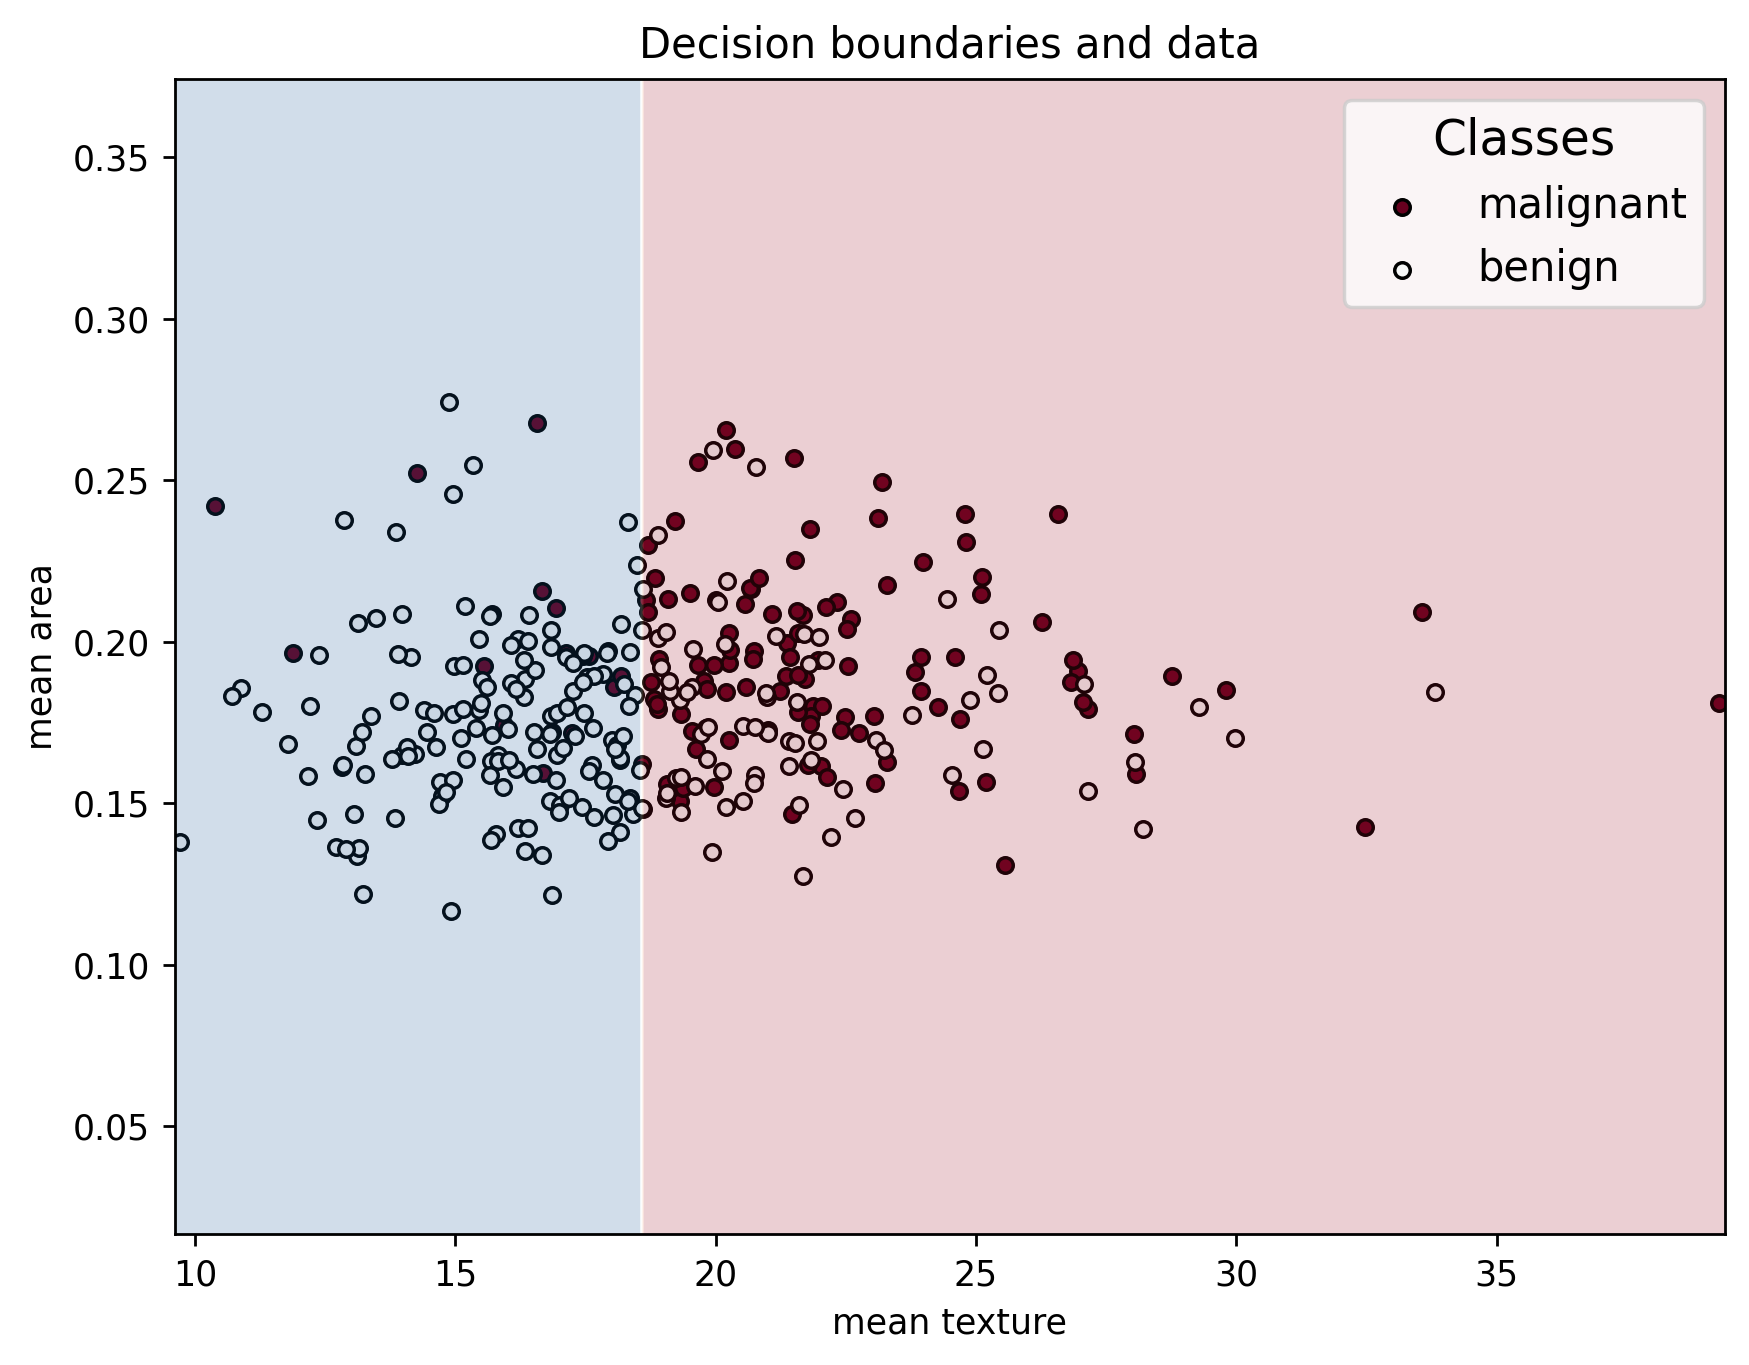

In [57]:
plot_decision_boundaries(X_train, y_train, X_train, clf_underfit, feature_names, data["target_names"])

### Bias-variance tradeoff

There are two very important concepts in machine learning which are intimately connected to model complexity, and to the phenomena of overfitting and underfitting. These two concepts are:

- Bias: Bias refers to the error introduced by approximating a real-world problem, which may be complex, by a much simpler model. A model with high bias tends to make strong assumptions about the data and may miss relevant relations between features and target labels. This often results in underfitting (poor performance on both training and test data).
- Variance: Variance refers to the model’s sensitivity to small fluctuations in the training dataset. A model with high variance pays too much attention to the training data, including its noise and specific patterns, and tends to perform poorly on new, unseen data. In order words, the model tends to overfit to the data.

Let’s consider how this plays out in the context of decision trees.

In a very complex, overfitted tree, the model is flexible enough to capture all the details of the training data—including noise or outliers. As a result, the structure of the tree will vary significantly if you train it on slightly different data each time. This is what we call high variance. However, because it models the training data so closely, its error on that data is low, and thus the bias is low.

On the other hand, a simpler decision tree, such as one with a small maximum depth, might not be flexible enough to capture the underlying patterns in the data. Its predictions may be consistently off because it cannot model the complexity of the decision boundary. This results in high bias but low variance, since the tree structure doesn’t change much with different training sets.

Ideally, we look to construct a model that is neither too simple nor too complex. This sweet spot minimizes both bias and variance and so achieves good generalization performance on unseen data. This trade-off is visually illustrated in the following figure:

```{figure} images/biasvvariance.png
---
height: 250px
name:   biasvsvariance
align:  center
---
Bias-variance tradeoff
```

This is also one of the motivations behind ensemble methods like random forests: by combining multiple high-variance trees and averaging their predictions, we can significantly reduce variance without significantly increasing bias. This allows us to get the predictive power of complex models while mitigating their tendency to overfit.

## From trees to forests

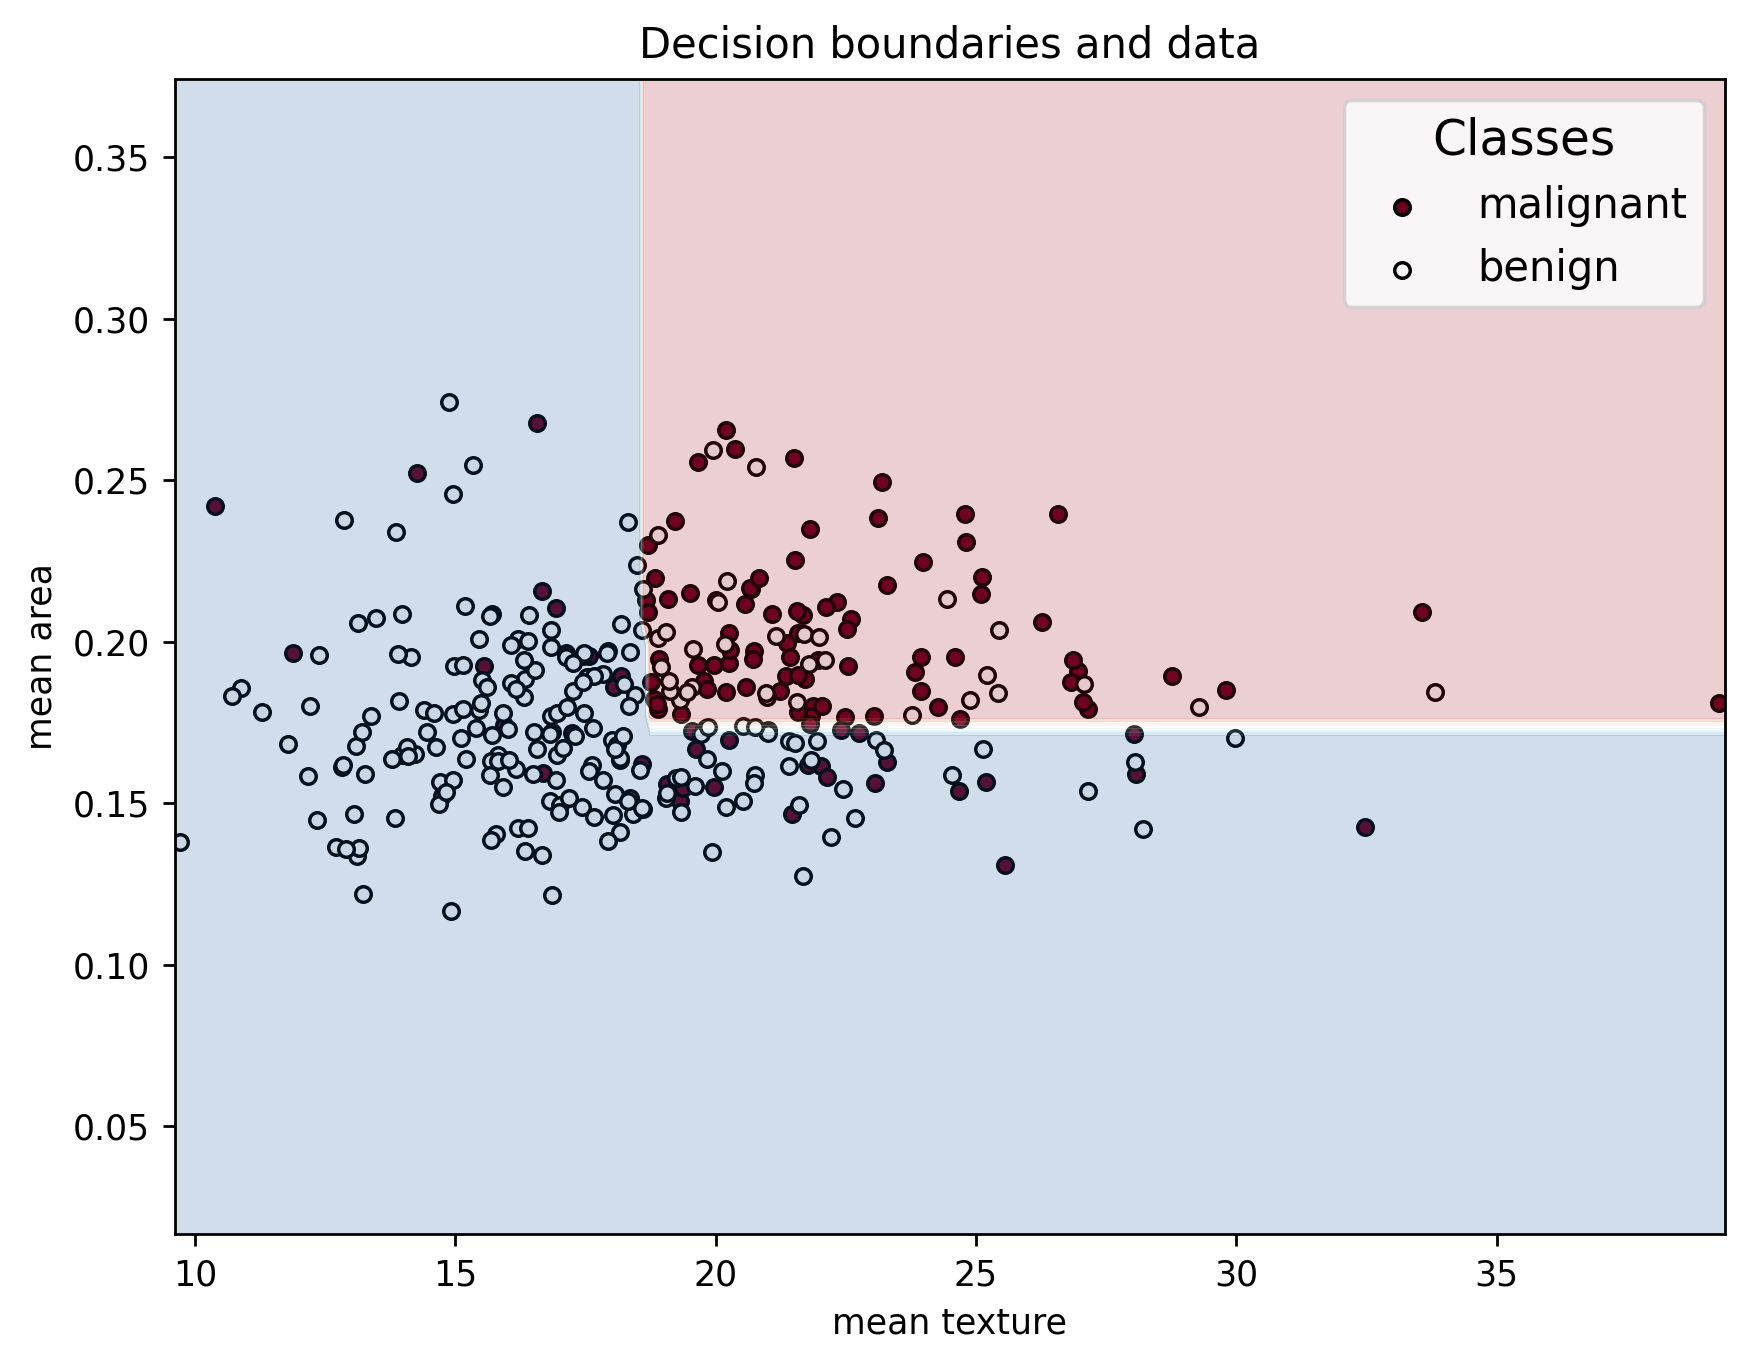

Training Set Metrics:
Accuracy: 0.7918
Precision: 0.8372
Recall: 0.8333
F1 Score: 0.8353

Validation Set Metrics:
Accuracy: 0.7105
Precision: 0.7229
Recall: 0.8571
F1 Score: 0.7843


In [82]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    random_state=42,
)
rf_clf = rf_clf.fit(
    X_train, 
    y_train,
)

# Plot decision boundaries for Random Forest
plot_decision_boundaries(X_train, y_train, X_train, rf_clf, feature_names, data["target_names"])

# Computing metrics for Random Forest
y_train_pred = rf_clf.predict(X_train)
y_val_pred = rf_clf.predict(X_val)
# Compute metrics for training and validation sets
print("Training Set Metrics:")
compute_metrics(y_train, y_train_pred)
print("\nValidation Set Metrics:")
compute_metrics(y_val, y_val_pred)

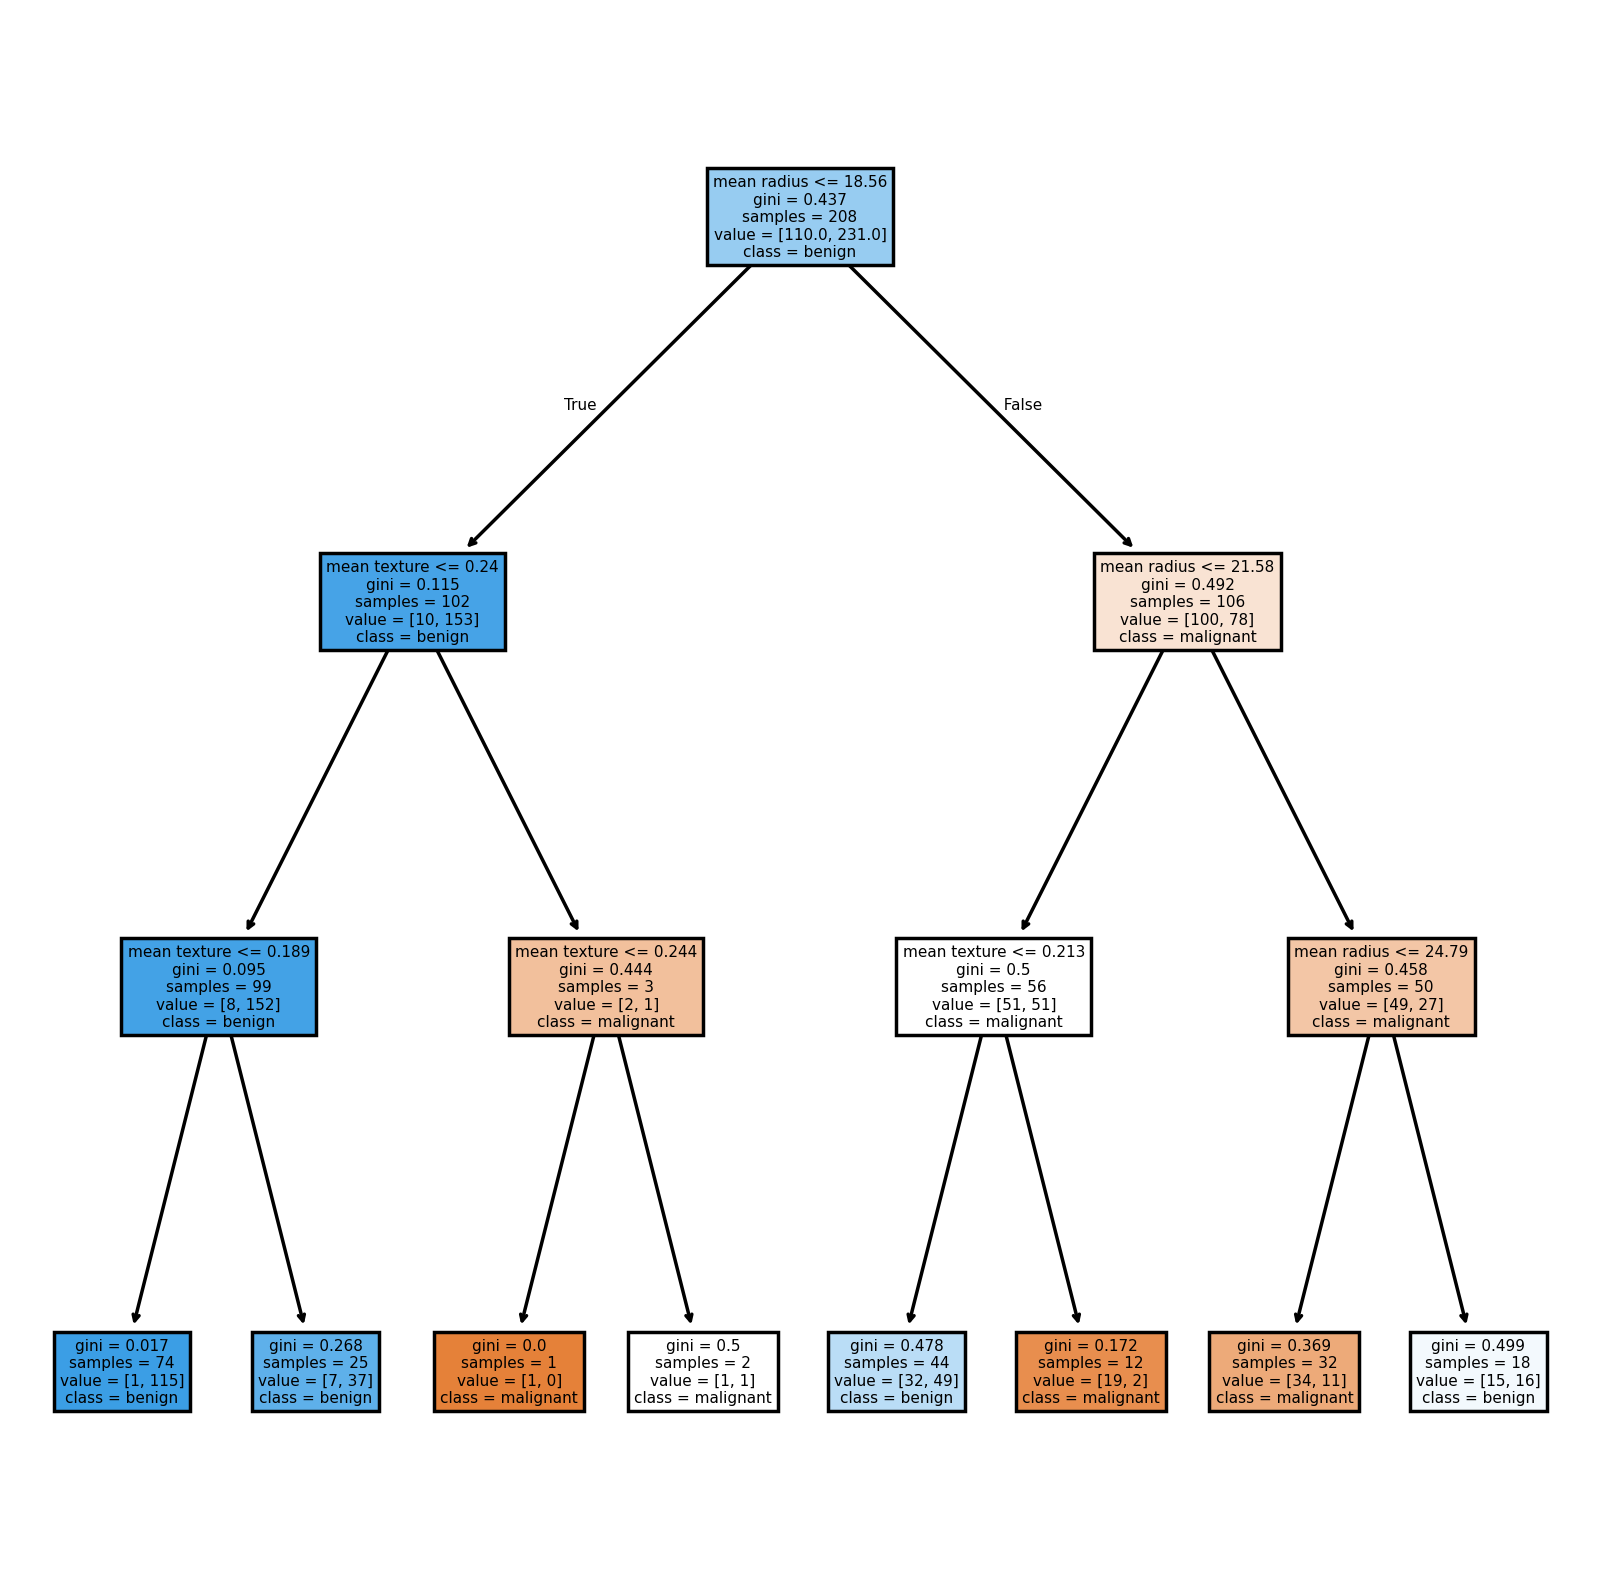

In [68]:
plt.figure(figsize=(8, 8), dpi=250)
tree.plot_tree(
    rf_clf.estimators_[2], 
    filled=True,
    feature_names=data["feature_names"],
    class_names=data["target_names"],
)
plt.show()

## Practice

Consider that this data is used for diagnosing tumors. What performance metric would be most useful for this context? Select the appropriate metric and build a classification tree which classifies data with > 0.90 in that metric. Note that you are allowed to use other features and modify the model is other ways. For more information on the things you can change, take a look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

Hint: Build histograms of other features in order to understand if they could be useful to differentiate between the two classes. You can use the following function or `sns.pairplot` for this, but if you use the latter, make sure you're not including too many features as the plot might be too large.

In [59]:
# Plot histogram of all features in data_df using sns
def plot_feature_histogram(df, feature, target_col="target", target_names=None):
    """Plots a histogram of a single feature in the dataframe, colored by class."""
    plt.figure(figsize=(4, 4), dpi=100)
    sns.histplot(
        df,
        x=feature,
        hue=target_col,
        bins=30,
        stat="count",
        common_norm=False,
        palette="Set1",
    )
    plt.title(f"Distribution of {feature} by Class")
    plt.xlabel(feature)
    plt.ylabel("Count")
    if target_names is not None:
        plt.legend(title="Class", labels=target_names)
    plt.show()

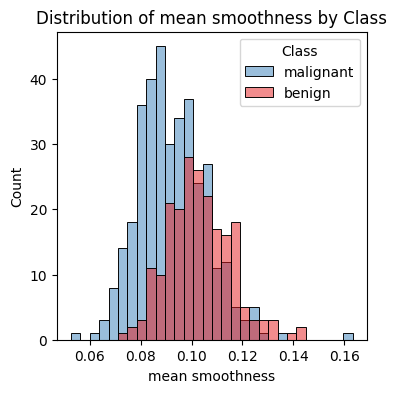

In [60]:
plot_feature_histogram(data_df, "mean smoothness", target_col="target", target_names=data["target_names"])